In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [ ]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [ ]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [ ]:
y['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [ ]:
!pip install ace_tools

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder

# 1. 존재하는 범주형 컬럼만 사용
all_categorical_cols = ['workclass', 'education', 'marital_status', 'occupation',
                        'relationship', 'race', 'sex', 'native_country']

# 실제 존재하는 컬럼만 필터링
categorical_cols = [col for col in all_categorical_cols if col in X.columns]

onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # 최신 버전에서는 sparse_output 사용
X_cat = onehot_encoder.fit_transform(X[categorical_cols])
X_cat = pd.DataFrame(X_cat, columns=onehot_encoder.get_feature_names_out(categorical_cols))

# 2. 숫자형 데이터 Scaling
numerical_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
numerical_cols = [col for col in numerical_cols if col in X.columns]  # 존재하는 숫자형 컬럼만 선택

scaler = MinMaxScaler()
X_num = pd.DataFrame(scaler.fit_transform(X[numerical_cols]), columns=numerical_cols)

# 3. 타겟 변수 변환 (>50K -> 1, <=50K -> 0)
y_encoded = LabelEncoder().fit_transform(y)

# 4. 모든 변환된 데이터 합치기
X_processed = pd.concat([X_num, X_cat], axis=1)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X_processed.head()

,age,fnlwgt,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,0.301370,0.044131,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.452055,0.048052,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.287671,0.137581,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.493151,0.150486,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.150685,0.220635,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.2, random_state=42)

In [ ]:
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = np.array(y_train).ravel()  # (N,) 형태로 변환
y_test_np = np.array(y_test).ravel()

In [ ]:
!pip install pytorch_tabnet
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import torch
import torch.nn as nn
import scipy
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.pretraining import TabNetPretrainer

import optuna
from optuna import Trial
from optuna.samplers import TPESampler

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
tabnet_clf = TabNetClassifier(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size":10, "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax',
)

In [ ]:
tabnet_clf.fit(
    X_train=X_train_np, y_train=y_train_np,
    eval_set=[(X_test_np, y_test_np)],
    eval_metric=['accuracy'],
    max_epochs=30,  # 50 → 30으로 줄이기
    patience=5,  # 조기 종료
    batch_size=256,  # 기존 1024 → 256으로 줄이기
    virtual_batch_size=64,
    num_workers=0,
    weights=1,
    drop_last=False
)

epoch 0  | loss: 1.25634 | val_0_accuracy: 0.25305 |  0:00:06s
epoch 1  | loss: 1.14103 | val_0_accuracy: 0.39165 |  0:00:11s
epoch 2  | loss: 1.11961 | val_0_accuracy: 0.47139 |  0:00:16s
epoch 3  | loss: 1.114   | val_0_accuracy: 0.47292 |  0:00:22s
epoch 4  | loss: 1.10311 | val_0_accuracy: 0.45522 |  0:00:27s
epoch 5  | loss: 1.10079 | val_0_accuracy: 0.49893 |  0:00:32s
epoch 6  | loss: 1.09916 | val_0_accuracy: 0.47446 |  0:00:37s
epoch 7  | loss: 1.10032 | val_0_accuracy: 0.49104 |  0:00:42s
epoch 8  | loss: 1.10009 | val_0_accuracy: 0.45573 |  0:00:48s
epoch 9  | loss: 1.09655 | val_0_accuracy: 0.46054 |  0:00:53s
epoch 10 | loss: 1.09662 | val_0_accuracy: 0.4892  |  0:00:58s

Early stopping occurred at epoch 10 with best_epoch = 5 and best_val_0_accuracy = 0.49893


In [ ]:
# 예측 수행
y_pred = tabnet_clf.predict(X_test_np)

# 정확도 계산
accuracy = accuracy_score(y_test_np, y_pred)
accuracy

0.49892517146074317

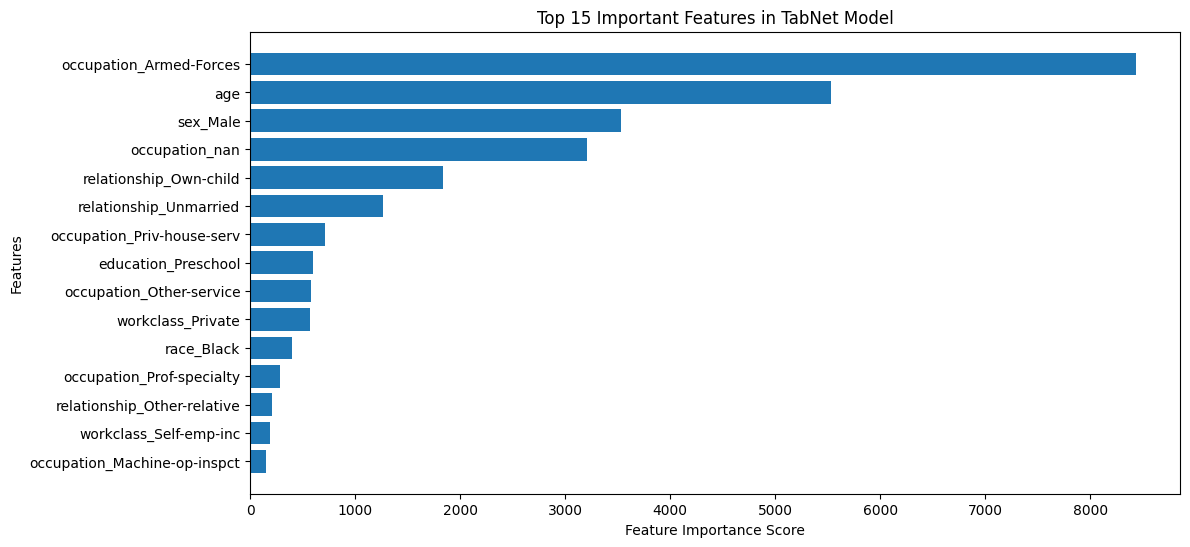

In [ ]:
# 특성 중요도 계산
explain_matrix, masks = tabnet_clf.explain(X_test_np)  # TabNet의 explain 기능 사용
feature_importances = explain_matrix.sum(axis=0)  # 전체 중요도 합산

# 특성 이름 가져오기
feature_names = np.array(X_train.columns)

# 중요도를 기준으로 정렬
sorted_idx = np.argsort(feature_importances)[::-1]  # 내림차순 정렬
sorted_importances = feature_importances[sorted_idx]
sorted_features = feature_names[sorted_idx]

# 시각화 (상위 15개 특성)
plt.figure(figsize=(12, 6))
plt.barh(sorted_features[:15], sorted_importances[:15], align='center')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 15 Important Features in TabNet Model")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# TabNet이 예측 과정에서 어떤 특성을 집중적으로 보는지 확인
explain_matrix, masks = tabnet_clf.explain(X_test_np)

# explain_matrix: 모델이 전체적으로 중요하다고 생각하는 특성 가중치
# masks: 각 학습 step에서 어떤 특성을 강조했는지 보여주는 마스크 행렬 (list 형태)

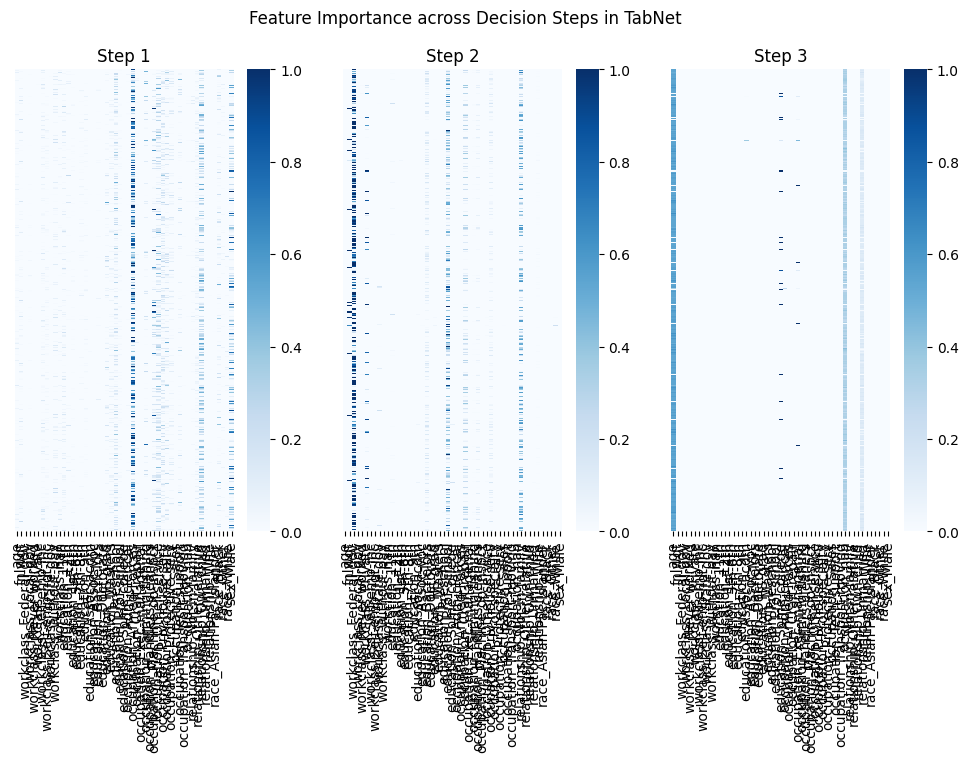

In [ ]:
# 마스크 데이터 추출 (TabNet이 학습 스텝별로 어디를 집중적으로 봤는지)
num_steps = len(masks)  # 학습 단계 개수
feature_names = np.array(X_train.columns)

plt.figure(figsize=(12, 6))

# 각 스텝에서의 특성 중요도를 히트맵으로 표현
for i in range(num_steps):
    plt.subplot(1, num_steps, i+1)
    sns.heatmap(masks[i], cmap="Blues", xticklabels=feature_names, yticklabels=False)
    plt.title(f"Step {i+1}")

plt.suptitle("Feature Importance across Decision Steps in TabNet")
plt.show()